# 模糊化資料

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt

In [4]:
all_withtraffic = pd.read_excel("all_withtraffic.xlsx")

In [5]:
all_withtraffic

,BrandName,CustCode,ProdtCode,SlipDate,TA性別,layer1,layer2,layer3,layer4,month,...,金額,顏色,類型,貨號,建議售價,momo_瀏覽數,momo_造訪數,yahoo_瀏覽量,shopee_瀏覽數,shopee_造訪數
0,Lifestyle373,B01125,1901083031,2020-01-30,中性,TIER 2 to 3 復古鞋,LF373,ML373MTD,ML373MTDD100,1,...,1564,鐵灰,鞋,ML373MTDD100,2350,18496.571429,1627.428571,NaN,9867.142857,3910.285714
1,PERFCRUZ,B01125,1901083344,2020-01-30,中性,緩震跑鞋,PFCRUZ,UCRUZGB2,UCRUZGB2D110,1,...,1761,白色,鞋,UCRUZGB2D110,3650,18496.571429,1627.428571,NaN,9867.142857,3910.285714
2,Lifestyle574,B01125,1901083469,2020-01-30,女性,TIER 2 復古鞋,LF574,WL574WNO,WL574WNOB065,1,...,1904,淺灰,鞋,WL574WNOB065,2850,18496.571429,1627.428571,NaN,9867.142857,3910.285714
3,PERFNRGS,B01125,1901080567,2020-02-03,女性,女性專用多功能訓練鞋,PFNRGS,WNRGSSB1,WNRGSSB1D070,2,...,4884,灰色,鞋,WNRGSSB1D070,2380,20883.857143,1912.000000,NaN,14159.714286,3185.714286
4,Lifestyle500,B01125,1901081403,2020-01-20,女性,500 經典復古鞋,LF500,GW500NPK,GW500NPKB060,1,...,1343,桃紅,鞋,GW500NPKB060,2350,14121.428571,1343.000000,NaN,4723.285714,2548.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51269,Lifestyle997,B02008-5,1901082276,2020-09-28,中性,TIER 2 復古鞋,LF997,MS997HN,MS997HND090,9,...,2056,黑色,鞋,MS997HND090,3650,59880.666667,5798.666667,5861.333333,8383.333333,2009.333333
51270,PERF480,B02008-5,1901083382,2020-09-28,女性,緩震跑鞋,PF480,W480SG5,W480SG54E065,9,...,1219,灰色,鞋,W480SG54E065,2450,59880.666667,5798.666667,5861.333333,8383.333333,2009.333333
51271,Lifestyle996,B02008-5,1901080303,2020-09-29,中性,TIER 3 復古鞋/童鞋,LF996,IZ996PAC,IZ996PACW090,9,...,888,淺紫,鞋,IZ996PACW090,1480,59880.666667,5798.666667,5861.333333,8383.333333,2009.333333
51272,Lifestyle997,B02008-5,1901086336,2020-09-29,中性,TIER 2 復古鞋,LF997,CM997HCB,CM997HCBD065,9,...,1628,牙白,鞋,CM997HCBD065,2850,59880.666667,5798.666667,5861.333333,8383.333333,2009.333333


In [6]:
LF574 = all_withtraffic[(all_withtraffic['layer2'] == "LF574") & (all_withtraffic['TA性別'] == "女性") & (all_withtraffic['建議售價'].isin([2880, 2850])) & (all_withtraffic['客戶名稱'].isin(['蝦皮', 'YAHOO', 'MOMO']))]


In [7]:
LF574

,BrandName,CustCode,ProdtCode,SlipDate,TA性別,layer1,layer2,layer3,layer4,month,...,金額,顏色,類型,貨號,建議售價,momo_瀏覽數,momo_造訪數,yahoo_瀏覽量,shopee_瀏覽數,shopee_造訪數
2,Lifestyle574,B01125,1901083469,2020-01-30,女性,TIER 2 復古鞋,LF574,WL574WNO,WL574WNOB065,1,...,1904,淺灰,鞋,WL574WNOB065,2850,18496.571429,1627.428571,NaN,9867.142857,3910.285714
22,Lifestyle574,B01125,1901083463,2020-02-21,女性,TIER 2 復古鞋,LF574,WL574WNK,WL574WNKB080,2,...,1809,灰色,鞋,WL574WNKB080,2850,30256.857143,3011.285714,NaN,60377.285714,15330.714286
23,Lifestyle574,B01125,1901083471,2020-02-21,女性,TIER 2 復古鞋,LF574,WL574WNO,WL574WNOB075,2,...,1809,淺灰,鞋,WL574WNOB075,2850,30256.857143,3011.285714,NaN,60377.285714,15330.714286
24,Lifestyle574,B01125,1901083463,2020-02-24,女性,TIER 2 復古鞋,LF574,WL574WNK,WL574WNKB080,2,...,1628,灰色,鞋,WL574WNKB080,2850,29053.571429,2733.714286,3372.000000,11014.285714,2451.857143
25,Lifestyle574,B01125,1901083471,2020-02-24,女性,TIER 2 復古鞋,LF574,WL574WNO,WL574WNOB075,2,...,3618,淺灰,鞋,WL574WNOB075,2850,29053.571429,2733.714286,3372.000000,11014.285714,2451.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51061,Lifestyle574,B02008-5,1901084295,2020-09-28,女性,TIER 3 復古鞋,LF574,WL574BCM,WL574BCMB080,9,...,2017,深藍,鞋,WL574BCMB080,2880,59880.666667,5798.666667,5861.333333,8383.333333,2009.333333
51127,Lifestyle574,B02008-5,1901086460,2020-07-10,女性,TIER 3 復古鞋,LF574,WL574SAX,WL574SAXB075,7,...,1761,粉紫,鞋,WL574SAXB075,2880,38974.142857,4255.285714,6117.571429,18757.571429,4199.857143
51167,Lifestyle574,B02008-5,1901086460,2020-08-12,女性,TIER 3 復古鞋,LF574,WL574SAX,WL574SAXB075,8,...,1889,粉紫,鞋,WL574SAXB075,2880,72475.714286,7058.428571,6774.571429,15803.285714,4646.714286
51184,Lifestyle574,B02008-5,1901086460,2020-08-27,女性,TIER 3 復古鞋,LF574,WL574SAX,WL574SAXB075,8,...,1894,粉紫,鞋,WL574SAXB075,2880,65749.857143,6570.428571,3960.142857,5646.857143,1606.285714


In [8]:
LF574.reset_index(drop=True, inplace=True)

In [9]:
LF574.columns

Index(['BrandName', 'CustCode', 'ProdtCode', 'SlipDate', 'TA性別', 'layer1',
       'layer2', 'layer3', 'layer4', 'month', 'size_US', 'size_cm', 'week',
       '單價', '型號', '客戶名稱', '尺寸', '數量', '金額', '顏色', '類型', '貨號', '建議售價',
       'momo_瀏覽數', 'momo_造訪數', 'yahoo_瀏覽量', 'shopee_瀏覽數', 'shopee_造訪數'],
      dtype='object')

In [10]:
imputer = KNNImputer(n_neighbors=2)
LF574[list(LF574.columns[-5:])] = imputer.fit_transform(LF574[list(LF574.columns[-5:])])

In [11]:
LF574

,BrandName,CustCode,ProdtCode,SlipDate,TA性別,layer1,layer2,layer3,layer4,month,...,金額,顏色,類型,貨號,建議售價,momo_瀏覽數,momo_造訪數,yahoo_瀏覽量,shopee_瀏覽數,shopee_造訪數
0,Lifestyle574,B01125,1901083469,2020-01-30,女性,TIER 2 復古鞋,LF574,WL574WNO,WL574WNOB065,1,...,1904,淺灰,鞋,WL574WNOB065,2850,18496.571429,1627.428571,5725.142857,9867.142857,3910.285714
1,Lifestyle574,B01125,1901083463,2020-02-21,女性,TIER 2 復古鞋,LF574,WL574WNK,WL574WNKB080,2,...,1809,灰色,鞋,WL574WNKB080,2850,30256.857143,3011.285714,5869.714286,60377.285714,15330.714286
2,Lifestyle574,B01125,1901083471,2020-02-21,女性,TIER 2 復古鞋,LF574,WL574WNO,WL574WNOB075,2,...,1809,淺灰,鞋,WL574WNOB075,2850,30256.857143,3011.285714,5869.714286,60377.285714,15330.714286
3,Lifestyle574,B01125,1901083463,2020-02-24,女性,TIER 2 復古鞋,LF574,WL574WNK,WL574WNKB080,2,...,1628,灰色,鞋,WL574WNKB080,2850,29053.571429,2733.714286,3372.000000,11014.285714,2451.857143
4,Lifestyle574,B01125,1901083471,2020-02-24,女性,TIER 2 復古鞋,LF574,WL574WNO,WL574WNOB075,2,...,3618,淺灰,鞋,WL574WNOB075,2850,29053.571429,2733.714286,3372.000000,11014.285714,2451.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2618,Lifestyle574,B02008-5,1901084295,2020-09-28,女性,TIER 3 復古鞋,LF574,WL574BCM,WL574BCMB080,9,...,2017,深藍,鞋,WL574BCMB080,2880,59880.666667,5798.666667,5861.333333,8383.333333,2009.333333
2619,Lifestyle574,B02008-5,1901086460,2020-07-10,女性,TIER 3 復古鞋,LF574,WL574SAX,WL574SAXB075,7,...,1761,粉紫,鞋,WL574SAXB075,2880,38974.142857,4255.285714,6117.571429,18757.571429,4199.857143
2620,Lifestyle574,B02008-5,1901086460,2020-08-12,女性,TIER 3 復古鞋,LF574,WL574SAX,WL574SAXB075,8,...,1889,粉紫,鞋,WL574SAXB075,2880,72475.714286,7058.428571,6774.571429,15803.285714,4646.714286
2621,Lifestyle574,B02008-5,1901086460,2020-08-27,女性,TIER 3 復古鞋,LF574,WL574SAX,WL574SAXB075,8,...,1894,粉紫,鞋,WL574SAXB075,2880,65749.857143,6570.428571,3960.142857,5646.857143,1606.285714


In [12]:
LF574[['CustCode', '客戶名稱']].pivot_table(index="CustCode", aggfunc="sum")

,客戶名稱
CustCode,
B01125,蝦皮蝦皮蝦皮蝦皮蝦皮蝦皮蝦皮蝦皮蝦皮蝦皮蝦皮蝦皮蝦皮蝦皮蝦皮蝦皮蝦皮蝦皮蝦皮蝦皮蝦皮蝦皮蝦皮...
B02007-2,YAHOOYAHOOYAHOOYAHOOYAHOOYAHOOYAHOOYAHOOYAHOOY...
B02008-5,MOMOMOMOMOMOMOMOMOMOMOMOMOMOMOMOMOMOMOMOMOMOMO...


In [13]:
LF574.columns

Index(['BrandName', 'CustCode', 'ProdtCode', 'SlipDate', 'TA性別', 'layer1',
       'layer2', 'layer3', 'layer4', 'month', 'size_US', 'size_cm', 'week',
       '單價', '型號', '客戶名稱', '尺寸', '數量', '金額', '顏色', '類型', '貨號', '建議售價',
       'momo_瀏覽數', 'momo_造訪數', 'yahoo_瀏覽量', 'shopee_瀏覽數', 'shopee_造訪數'],
      dtype='object')

In [14]:
LF574 = LF574.rename(columns={"momo_瀏覽數": "A_瀏覽數_standard", "momo_造訪數": "A_造訪數_standard", "yahoo_瀏覽量": "B_瀏覽量_standard", "shopee_瀏覽數": "C_瀏覽數_standard", "shopee_造訪數": "C_造訪數_standard"})

In [15]:
LF574.replace({"B02008-5": "A", "B02007-2": "B", "B01125": "C"}, inplace=True)

In [16]:
LF574 = LF574.drop(['BrandName', 'ProdtCode', 'TA性別', 'layer1', 'layer2', 'layer3', 'layer4', 'size_US', '型號', '客戶名稱', '尺寸', '顏色', '類型', '貨號'], axis=1)

In [17]:
LF574

,CustCode,SlipDate,month,size_cm,week,單價,數量,金額,建議售價,A_瀏覽數_standard,A_造訪數_standard,B_瀏覽量_standard,C_瀏覽數_standard,C_造訪數_standard
0,C,2020-01-30,1,23.5,2020-01-27,1904.0,1,1904,2850,18496.571429,1627.428571,5725.142857,9867.142857,3910.285714
1,C,2020-02-21,2,25.0,2020-02-17,1809.0,1,1809,2850,30256.857143,3011.285714,5869.714286,60377.285714,15330.714286
2,C,2020-02-21,2,24.5,2020-02-17,1809.0,1,1809,2850,30256.857143,3011.285714,5869.714286,60377.285714,15330.714286
3,C,2020-02-24,2,25.0,2020-02-24,1628.0,1,1628,2850,29053.571429,2733.714286,3372.000000,11014.285714,2451.857143
4,C,2020-02-24,2,24.5,2020-02-24,1809.0,2,3618,2850,29053.571429,2733.714286,3372.000000,11014.285714,2451.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2618,A,2020-09-28,9,25.0,2020-09-28,2017.0,1,2017,2880,59880.666667,5798.666667,5861.333333,8383.333333,2009.333333
2619,A,2020-07-10,7,24.5,2020-07-06,1761.0,1,1761,2880,38974.142857,4255.285714,6117.571429,18757.571429,4199.857143
2620,A,2020-08-12,8,24.5,2020-08-10,1889.0,1,1889,2880,72475.714286,7058.428571,6774.571429,15803.285714,4646.714286
2621,A,2020-08-27,8,24.5,2020-08-24,1894.0,1,1894,2880,65749.857143,6570.428571,3960.142857,5646.857143,1606.285714


In [18]:
LF574 = LF574.drop(LF574.columns[-5:], axis=1)

In [19]:
LF574

,CustCode,SlipDate,month,size_cm,week,單價,數量,金額,建議售價
0,C,2020-01-30,1,23.5,2020-01-27,1904.0,1,1904,2850
1,C,2020-02-21,2,25.0,2020-02-17,1809.0,1,1809,2850
2,C,2020-02-21,2,24.5,2020-02-17,1809.0,1,1809,2850
3,C,2020-02-24,2,25.0,2020-02-24,1628.0,1,1628,2850
4,C,2020-02-24,2,24.5,2020-02-24,1809.0,2,3618,2850
...,...,...,...,...,...,...,...,...,...
2618,A,2020-09-28,9,25.0,2020-09-28,2017.0,1,2017,2880
2619,A,2020-07-10,7,24.5,2020-07-06,1761.0,1,1761,2880
2620,A,2020-08-12,8,24.5,2020-08-10,1889.0,1,1889,2880
2621,A,2020-08-27,8,24.5,2020-08-24,1894.0,1,1894,2880


In [20]:
for i in range(len(LF574)):
    if LF574.loc[i, '建議售價'] == 2880:
        LF574.at[i, '單價'] = LF574.at[i, '單價']*1.5-1320
        LF574.at[i, '建議售價'] =  LF574.at[i, '建議售價']*1.5-1320
    if LF574.at[i, '建議售價'] == 2850:
        LF574.at[i, '單價'] = LF574.at[i, '單價']*1.5-1275
        LF574.at[i, '建議售價'] = LF574.at[i, '建議售價']*1.5-1275

In [21]:
LF574.drop("金額", axis=1, inplace=True)

In [22]:
LF574_pivot = LF574.pivot_table(index="week", columns="CustCode", aggfunc={"單價": np.mean, "數量": np.sum})

In [23]:
LF574_pivot.columns = [' '.join(col).strip() for col in LF574_pivot.columns.values]
LF574_pivot.reset_index(inplace=True)

In [24]:
LF574_pivot

,week,單價 A,單價 B,單價 C,數量 A,數量 B,數量 C
0,2019-12-30,2145.000000,1062.750000,NaN,4.0,5.0,NaN
1,2020-01-06,997.676471,1336.500000,NaN,47.0,9.0,NaN
2,2020-01-13,1055.357143,870.625000,NaN,30.0,21.0,NaN
3,2020-01-20,1245.500000,1312.575000,NaN,17.0,12.0,NaN
4,2020-01-27,1245.187500,1229.100000,1603.650000,17.0,10.0,19.0
5,2020-02-03,1401.794118,1061.892857,1302.300000,18.0,19.0,15.0
6,2020-02-10,1384.333333,1214.825000,1269.392857,28.0,53.0,28.0
7,2020-02-17,966.785714,1176.807692,1254.886364,24.0,14.0,28.0
8,2020-02-24,901.066667,1348.107143,1207.655405,71.0,24.0,53.0
9,2020-03-02,995.653846,1497.681818,1249.762500,69.0,11.0,21.0


In [25]:
imputer = KNNImputer(n_neighbors=2)
LF574_pivot[LF574_pivot.columns[1:4]] = imputer.fit_transform(LF574_pivot[LF574_pivot.columns[1:4]])

In [26]:
LF574_pivot = LF574_pivot.fillna(0)

In [27]:
LF574_agg = pd.DataFrame()
LF574_agg['單價'] = list(LF574_pivot['單價 A']) + list(LF574_pivot['單價 B']) + list(LF574_pivot['單價 C'])
LF574_agg['數量'] = list(LF574_pivot['數量 A']) + list(LF574_pivot['數量 B']) + list(LF574_pivot['數量 C'])
LF574_agg

,單價,數量
0,2145.000000,4.0
1,997.676471,47.0
2,1055.357143,30.0
3,1245.500000,17.0
4,1245.187500,17.0
...,...,...
115,1145.625000,8.0
116,1233.000000,28.0
117,1129.000000,15.0
118,1022.165210,134.0


In [28]:
range_1 = LF574_agg[(800<=LF574_agg['單價']) & (LF574_agg['單價']<1000)]

(array([8., 8., 1., 3., 1., 2., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 10.        ,  25.46666667,  40.93333333,  56.4       ,
         71.86666667,  87.33333333, 102.8       , 118.26666667,
        133.73333333, 149.2       , 164.66666667, 180.13333333,
        195.6       , 211.06666667, 226.53333333, 242.        ]),
 <a list of 15 Patch objects>)

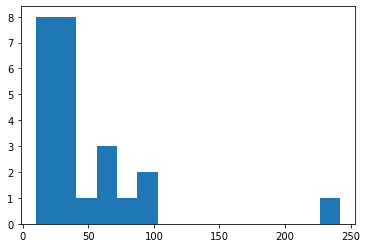

In [29]:
plt.hist(range_1['數量'], bins=15)

In [30]:
LF574.to_excel("LF574.xlsx", index=False)

## 處理流量

In [7]:
momo = pd.read_excel("momo流量.xls", skiprows=2)

In [8]:
scaler = StandardScaler(with_mean=False)
momo[momo.columns[-2:]] = scaler.fit_transform(momo[momo.columns[-2:]])

In [9]:
momo.drop("訂購金額", axis=1, inplace=True)

In [10]:
momo['seq_no'] = range(1, len(momo)+1)

In [11]:
momo.to_excel("A_流量資料.xlsx")

In [12]:
momo

,日期,造訪數,瀏覽數,seq_no
0,01/01,0.227278,0.192655,1
1,01/02,0.196609,0.149329,2
2,01/03,0.219885,0.170214,3
3,01/04,0.290259,0.217777,4
4,01/05,0.262602,0.203378,5
...,...,...,...,...
269,09/26,1.661047,1.753861,270
270,09/27,2.124366,2.350770,271
271,09/28,1.478677,1.447185,272
272,09/29,1.865324,1.723147,273


In [13]:
yahoo = pd.read_excel("yahoo購物中心流量.xlsx")

In [14]:
yahoo['seq_no'] = range(1, len(yahoo)+1)

In [15]:
imputer = KNNImputer(n_neighbors=2)
yahoo[['seq_no', "瀏覽量"]] = imputer.fit_transform(yahoo[['seq_no', "瀏覽量"]])

In [16]:
scaler = StandardScaler(with_mean=False)
yahoo['瀏覽量'] = scaler.fit_transform(np.array(yahoo['瀏覽量']).reshape(-1, 1))

In [17]:
yahoo.to_excel("B_流量資料.xlsx")

In [18]:
shopee = pd.read_excel("蝦皮流量.xlsx")

In [19]:
shopee.columns

Index(['日期', '總銷售額 (TWD)', '訂單總數', '平均訂單金額', '商品頁面瀏覽數', '訪客數', '訂單轉換率(可出貨訂單)',
       '買家數', '新買家數', '舊買家數', '潛在買家數', '回購率'],
      dtype='object')

In [20]:
shopee = shopee[['日期', '商品頁面瀏覽數', '訪客數']]

In [21]:
scaler = StandardScaler(with_mean=False)
shopee[shopee.columns[-2:]] = scaler.fit_transform(shopee[shopee.columns[-2:]])

In [22]:
shopee

,日期,商品頁面瀏覽數,訪客數
0,2020-01-01,0.004778,0.013793
1,2020-01-02,0.003893,0.010966
2,2020-01-03,0.003759,0.010537
3,2020-01-04,0.002924,0.008053
4,2020-01-05,0.004160,0.011822
...,...,...,...
269,2020-07-27,1.877519,1.880605
270,2020-07-28,0.377582,0.409498
271,2020-07-29,0.153489,0.196525
272,2020-07-30,0.137467,0.166026


In [23]:
shopee = shopee.rename({"商品頁面瀏覽數": "瀏覽數", "訪客數": "造訪數"}, axis=1)

In [24]:
shopee.to_excel("C_流量資料.xlsx")

In [25]:
total_flow = pd.read_excel("活動與流量統整.xlsx", index_col=0)
total_flow

,Yahoo_活動深度,MOMO_活動深度,蝦皮_活動深度,MOMO_瀏覽數,Yahoo_瀏覽數,蝦皮_瀏覽數
2020-03-01,小,小,中,24184,3372.0,9326
2020-03-02,小,小,中,17756,3507.0,7887
2020-03-03,小,小,中,47250,3264.0,7382
2020-03-04,小,小,無,21442,3772.0,7234
2020-03-05,小,小,無,25483,3260.0,9188
...,...,...,...,...,...,...
2020-09-26,小,小,大,68696,4786.0,112378
2020-09-27,小,小,大,92076,4755.0,22600
2020-09-28,小,小,小,56684,3884.0,9187
2020-09-29,中,小,小,67493,7954.0,8228


In [26]:
col = []
for i in total_flow.columns:
    i = i.replace("Yahoo", "B").replace("YAHOO", "B").replace("MOMO", "A").replace("蝦皮", "C")
    col.append(i)
total_flow.columns = col

In [27]:
total_flow['Weeknum'] = total_flow.reset_index()['index'].apply(lambda x: int(x.strftime("%V"))).to_list()

In [28]:
for i in ['A', 'B', 'C']:
    scaler = StandardScaler(with_mean=False)
    total_flow[i+'_瀏覽數'] = scaler.fit_transform(np.array(total_flow[i+'_瀏覽數']).reshape(-1, 1))

In [29]:
total_flow

,B_活動深度,A_活動深度,C_活動深度,A_瀏覽數,B_瀏覽數,C_瀏覽數,Weeknum
2020-03-01,小,小,中,0.596181,0.654371,0.143482,9
2020-03-02,小,小,中,0.437719,0.680569,0.121342,10
2020-03-03,小,小,中,1.164802,0.633413,0.113573,10
2020-03-04,小,小,無,0.528586,0.731995,0.111296,10
2020-03-05,小,小,無,0.628204,0.632636,0.141358,10
...,...,...,...,...,...,...,...
2020-09-26,小,小,大,1.693486,0.928772,1.728948,39
2020-09-27,小,小,大,2.269847,0.922756,0.347704,39
2020-09-28,小,小,小,1.397368,0.753730,0.141343,40
2020-09-29,中,小,小,1.663830,1.543555,0.126589,40


In [30]:
total_flow.to_excel("activity_flow.xlsx")

In [34]:
total_flow = pd.read_excel("activity_flow.xlsx", index_col=0)

In [40]:
type_pivot = total_flow.pivot_table(index="A_活動深度", aggfunc={"A_瀏覽數": [np.mean]})
type_pivot

,A_瀏覽數
,mean
A_活動深度,
中,1.545182
大,4.445274
小,0.987811


In [44]:
channel_activity = total_flow[total_flow.columns[:3]]

,B_活動深度,A_活動深度,C_活動深度
2020-03-01,小,小,中
2020-03-02,小,小,中
2020-03-03,小,小,中
2020-03-04,小,小,無
2020-03-05,小,小,無
...,...,...,...
2020-09-26,小,小,大
2020-09-27,小,小,大
2020-09-28,小,小,小
2020-09-29,中,小,小


In [35]:
total_flow

,B_活動深度,A_活動深度,C_活動深度,A_瀏覽數,B_瀏覽數,C_瀏覽數,Weeknum
2020-03-01,小,小,中,0.596181,0.654371,0.143482,9
2020-03-02,小,小,中,0.437719,0.680569,0.121342,10
2020-03-03,小,小,中,1.164802,0.633413,0.113573,10
2020-03-04,小,小,無,0.528586,0.731995,0.111296,10
2020-03-05,小,小,無,0.628204,0.632636,0.141358,10
...,...,...,...,...,...,...,...
2020-09-26,小,小,大,1.693486,0.928772,1.728948,39
2020-09-27,小,小,大,2.269847,0.922756,0.347704,39
2020-09-28,小,小,小,1.397368,0.753730,0.141343,40
2020-09-29,中,小,小,1.663830,1.543555,0.126589,40


In [72]:
flow = {}
for i in ['A', 'B', 'C']:
    type_pivot = total_flow.pivot_table(index=i+"_活動深度", aggfunc={i+"_瀏覽數": [np.mean]})
    weight = total_flow.pivot_table(index="Weeknum", columns=i+"_活動深度", aggfunc={i+"_瀏覽數": ['count']})
    if i == 'C':
        weight.columns=['中_count', '大_count', '小_count', '無_count']
    else:
        weight.columns=['中_count', '大_count', '小_count']
    weight.fillna(0, inplace=True)
    weight['加權瀏覽數'] = np.dot(np.array(weight), np.array(type_pivot))/7

    weight.reset_index(inplace=True)
    weight.at[0,'加權瀏覽數'] = weight.loc[0]['加權瀏覽數']*7
    flow[i] = weight['加權瀏覽數']

In [74]:
flow = {}
for i in ['A', 'B', 'C']:
    type_pivot = total_flow.pivot_table(index=i+"_活動深度", aggfunc={i+"_瀏覽數": [np.mean]})
    weight = total_flow.pivot_table(index=total_flow.index, columns=i+"_活動深度", aggfunc={i+"_瀏覽數": ['count']})
    if i == 'C':
        weight.columns=['中_count', '大_count', '小_count', '無_count']
    else:
        weight.columns=['中_count', '大_count', '小_count']
    weight.fillna(0, inplace=True)
    weight['加權瀏覽數'] = np.dot(np.array(weight), np.array(type_pivot))/7

    weight.reset_index(inplace=True)
    weight.at[0,'加權瀏覽數'] = weight.loc[0]['加權瀏覽數']*7
    flow[i] = weight['加權瀏覽數']

In [75]:
flow['A']

0      0.987811
1      0.141116
2      0.141116
3      0.141116
4      0.141116
         ...   
209    0.141116
210    0.141116
211    0.141116
212    0.141116
213    0.141116
Name: 加權瀏覽數, Length: 214, dtype: float64